In [1]:
import numpy as np
from data import Instance, DataSet
from miscellaneous import initialize_data, plot_graph, plot_points
from neural_network import NeuralNetwork
from activation_function import *
import matplotlib.pyplot as plt
from keras.datasets import mnist
import copy

/home/xeds/.conda/envs/atividade1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Leitura do conjunto de dados

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Descobrindo o número de instâncias e as dimensões de cada uma

In [3]:
num_instances, dim_x, dim_y = x_train.shape
num_instances += x_test.shape[0]

### Normalizando

In [4]:
#Treinamento
norm_input_train = [np.divide(i.astype(np.float32),255).flatten() for i in x_train]

output_train = []
y = 10*[0.0]

for n in y_train:
    y[n] = 1.0
    output_train.append(copy.deepcopy(y))
    y[n] = 0.0

In [5]:
#Teste
norm_input_test = [np.divide(i.astype(np.float32),255).flatten() for i in x_test]

output_test = []
y = 10*[0.0]

for n in y_test:
    y[n] = 1.0
    output_test.append(copy.deepcopy(y))
    y[n] = 0.0

### Organizando o dataset para ser passado no padrão aceito pela rede neural

In [6]:
dataset = DataSet() 

for i,j in zip(norm_input_train + norm_input_test, output_train + output_test):
    dataset.add(Instance(i,j))

### Criando as redes neurais

#### Rede neural 1

In [7]:
net_1 = NeuralNetwork(dim_x*dim_y ,[10], [sig_func]) # 90,11% - treino / 90,95% - teste
data_1 = net_1.fit(dataset, "mini-batch", 50, lr_ = 0.1, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], print_info = True)

Epoch 1/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.0706 - categorical_accuracy: 0.6181
Epoch 2/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.0448 - categorical_accuracy: 0.8168
Epoch 3/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.0376 - categorical_accuracy: 0.8416
Epoch 4/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0339 - categorical_accuracy: 0.8531
Epoch 5/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0316 - categorical_accuracy: 0.8608
Epoch 6/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.0300 - categorical_accuracy: 0.8659
Epoch 7/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.0288 - categorical_accuracy: 0.8695
Epoch 8/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.0278 - categorical_accuracy: 0.8726
Epoch 9/50
60000/60000 [==============================] - 5s

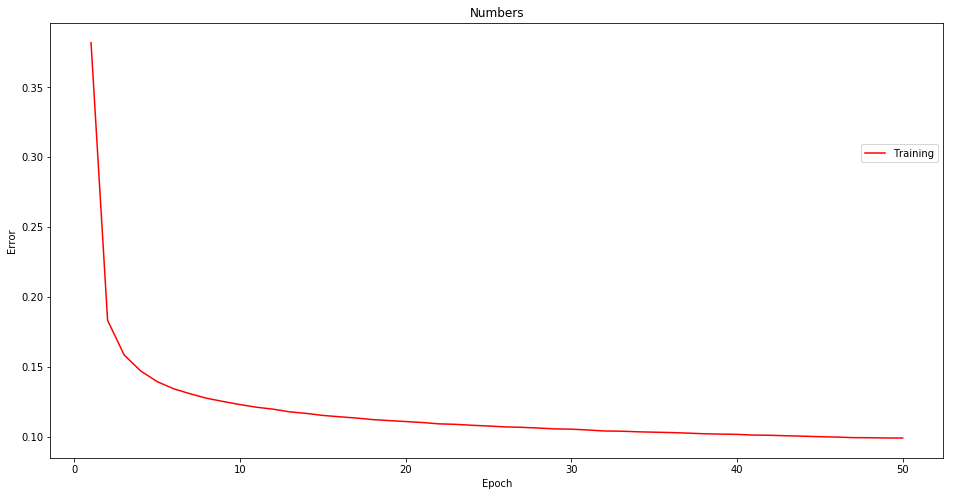

In [8]:
plot_graph(data_1, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 2

In [9]:
net_2 = NeuralNetwork(dim_x*dim_y ,[10], [tanh_func]) # 84,01% - treino / 84,27% - teste
data_2 = net_2.fit(dataset, "mini-batch", 50, lr_ = 0.1, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], print_info = True)

Epoch 1/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.0606 - categorical_accuracy: 0.7596
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.0480 - categorical_accuracy: 0.8294
Epoch 3/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.0459 - categorical_accuracy: 0.8364
Epoch 4/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.0448 - categorical_accuracy: 0.8391
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0441 - categorical_accuracy: 0.8402
Epoch 6/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.0436 - categorical_accuracy: 0.8398
Epoch 7/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.0433 - categorical_accuracy: 0.8409
Epoch 8/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0430 - categorical_accuracy: 0.8409
Epoch 9/50
60000/60000 [==============================] - 5s 82u

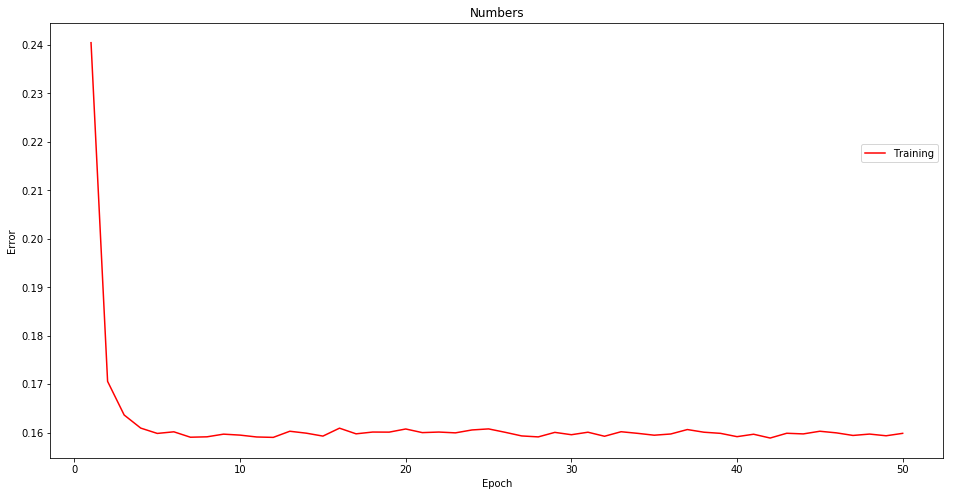

In [10]:
plot_graph(data_2, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 3

In [7]:
net_3 = NeuralNetwork(dim_x*dim_y ,[10], [sig_func]) # 92,63% - treino / 92,30% - teste
data_3 = net_3.fit(dataset, "mini-batch", 50, lr_ = 0.8, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.9, print_info = True)

Epoch 1/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.0503 - categorical_accuracy: 0.5889
Epoch 2/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0257 - categorical_accuracy: 0.8225
Epoch 3/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.0240 - categorical_accuracy: 0.8320
Epoch 4/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.0234 - categorical_accuracy: 0.8343
Epoch 5/50
60000/60000 [==============================] - 5s 92us/step - loss: 0.0230 - categorical_accuracy: 0.8356
Epoch 6/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.0227 - categorical_accuracy: 0.8371
Epoch 7/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.0225 - categorical_accuracy: 0.8387
Epoch 8/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.0224 - categorical_accuracy: 0.8385
Epoch 9/50
60000/60000 [==============================] - 5s 87u

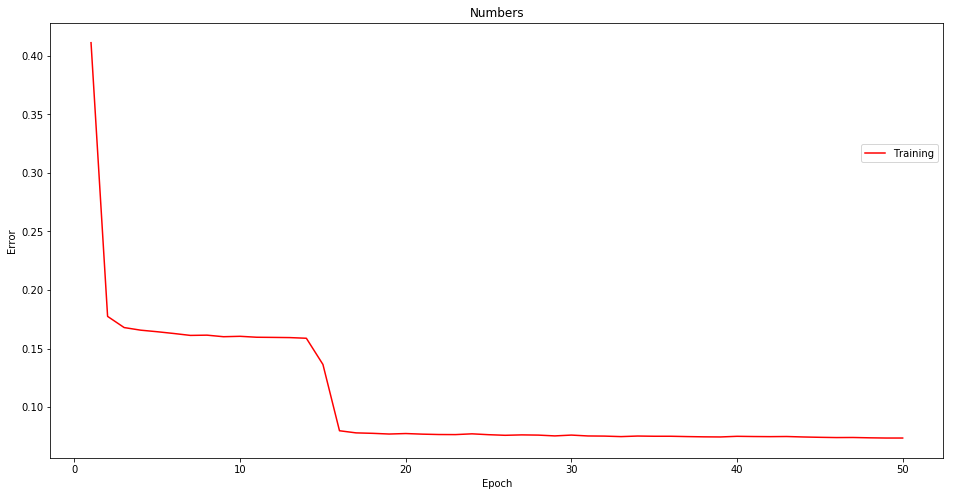

In [9]:
plot_graph(data_3, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 4

In [14]:
net_4 = NeuralNetwork(dim_x*dim_y ,[10], [tanh_func]) # 11,97% - treino / 14,31% - teste
data_4 = net_4.fit(dataset, "mini-batch", 50, lr_ = 0.8, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.9, print_info = True)

Epoch 1/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.3863 - categorical_accuracy: 0.2545
Epoch 2/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.3722 - categorical_accuracy: 0.2640
Epoch 3/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.4073 - categorical_accuracy: 0.1189
Epoch 4/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.4342 - categorical_accuracy: 0.1140
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.4810 - categorical_accuracy: 0.1187
Epoch 6/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.4955 - categorical_accuracy: 0.1159
Epoch 7/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.5216 - categorical_accuracy: 0.1159
Epoch 8/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.4768 - categorical_accuracy: 0.1084
Epoch 9/50
60000/60000 [==============================] - 6s 107

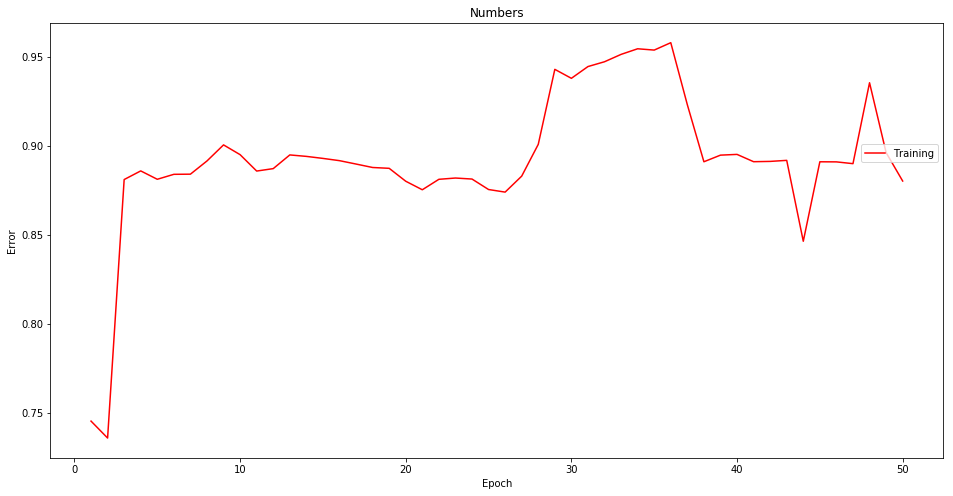

In [15]:
plot_graph(data_4, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 5

In [17]:
net_5 = NeuralNetwork(dim_x*dim_y ,[768,10], 2*[sig_func]) # 90,97% - treino / 91,60% - teste
data_5 = net_5.fit(dataset,"mini-batch", 50, lr_ = 0.1, type = "class",  mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.5, print_info = True)

Epoch 1/50
60000/60000 [==============================] - 20s 328us/step - loss: 0.0789 - categorical_accuracy: 0.4784
Epoch 2/50
60000/60000 [==============================] - 20s 338us/step - loss: 0.0546 - categorical_accuracy: 0.7472
Epoch 3/50
60000/60000 [==============================] - 20s 331us/step - loss: 0.0422 - categorical_accuracy: 0.8157
Epoch 4/50
60000/60000 [==============================] - 20s 334us/step - loss: 0.0360 - categorical_accuracy: 0.8411
Epoch 5/50
60000/60000 [==============================] - 20s 339us/step - loss: 0.0322 - categorical_accuracy: 0.8539
Epoch 6/50
60000/60000 [==============================] - 20s 337us/step - loss: 0.0297 - categorical_accuracy: 0.8619
Epoch 7/50
60000/60000 [==============================] - 21s 345us/step - loss: 0.0279 - categorical_accuracy: 0.8676
Epoch 8/50
60000/60000 [==============================] - 20s 334us/step - loss: 0.0265 - categorical_accuracy: 0.8719
Epoch 9/50
60000/60000 [========================

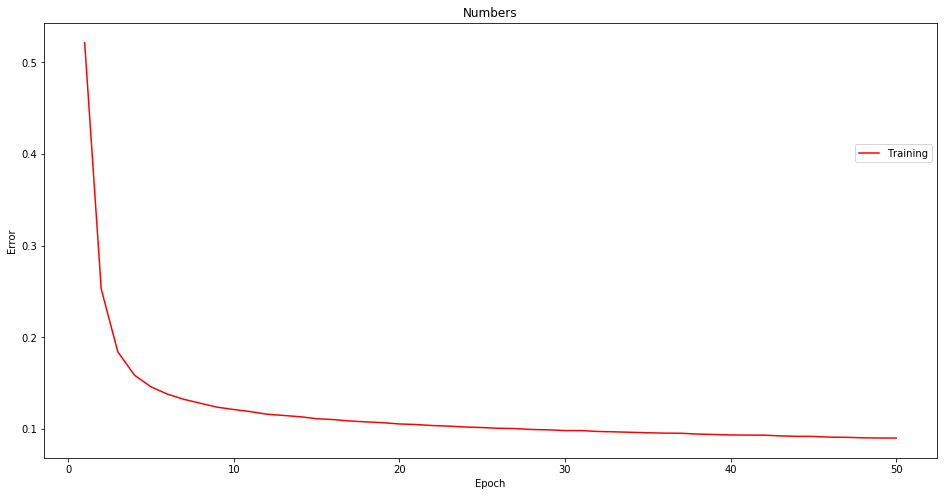

In [18]:
plot_graph(data_5, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 6

In [19]:
net_6 = NeuralNetwork(dim_x*dim_y ,[768,10], 2*[tanh_func]) # 97,55% - treino / 96,7% - teste
data_6 = net_6.fit(dataset,"mini-batch", 50, lr_ = 0.1, type = "class",  mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.5, print_info = True)

Epoch 1/50
60000/60000 [==============================] - 21s 347us/step - loss: 0.0471 - categorical_accuracy: 0.8307
Epoch 2/50
60000/60000 [==============================] - 21s 347us/step - loss: 0.0349 - categorical_accuracy: 0.8858
Epoch 3/50
60000/60000 [==============================] - 21s 354us/step - loss: 0.0291 - categorical_accuracy: 0.9104
Epoch 4/50
60000/60000 [==============================] - 21s 356us/step - loss: 0.0260 - categorical_accuracy: 0.9220
Epoch 5/50
60000/60000 [==============================] - 20s 339us/step - loss: 0.0239 - categorical_accuracy: 0.9297
Epoch 6/50
60000/60000 [==============================] - 20s 334us/step - loss: 0.0222 - categorical_accuracy: 0.9348
Epoch 7/50
60000/60000 [==============================] - 21s 349us/step - loss: 0.0208 - categorical_accuracy: 0.9393
Epoch 8/50
60000/60000 [==============================] - 21s 345us/step - loss: 0.0198 - categorical_accuracy: 0.9438
Epoch 9/50
60000/60000 [========================

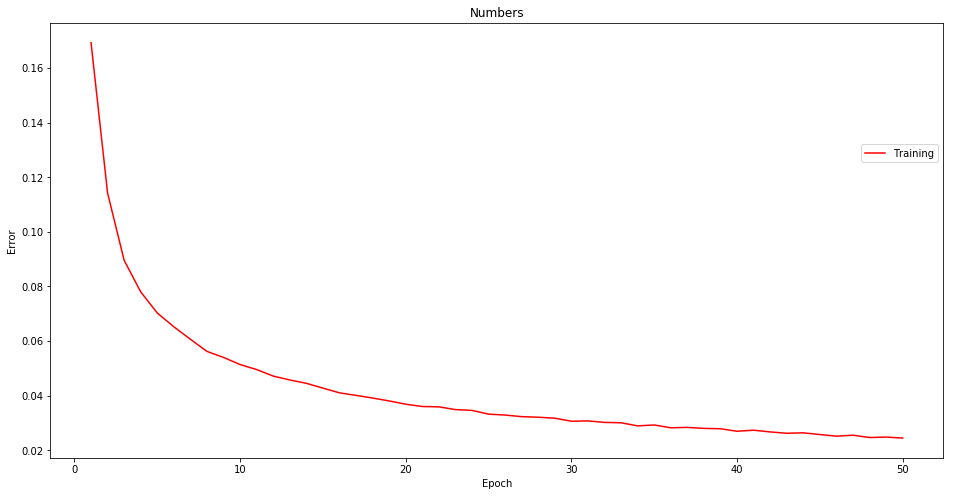

In [20]:
plot_graph(data_6, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 7

In [21]:
net_7 = NeuralNetwork(dim_x*dim_y ,[50, 10], 2*[sig_func]) # 99.07% - treino / 96.96% - teste
data_7 = net_7.fit(dataset, "mini-batch", 100, lr_ = 0.8, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.9, print_info = True)

Epoch 1/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.0533 - categorical_accuracy: 0.5658
Epoch 2/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0318 - categorical_accuracy: 0.7616
Epoch 3/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.0135 - categorical_accuracy: 0.9247
Epoch 4/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.0110 - categorical_accuracy: 0.9377
Epoch 5/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0097 - categorical_accuracy: 0.9453
Epoch 6/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.0088 - categorical_accuracy: 0.9498
Epoch 7/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0081 - categorical_accuracy: 0.9544
Epoch 8/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0076 - categorical_accuracy: 0.9571
Epoch 9/100
60000/60000 [==============================

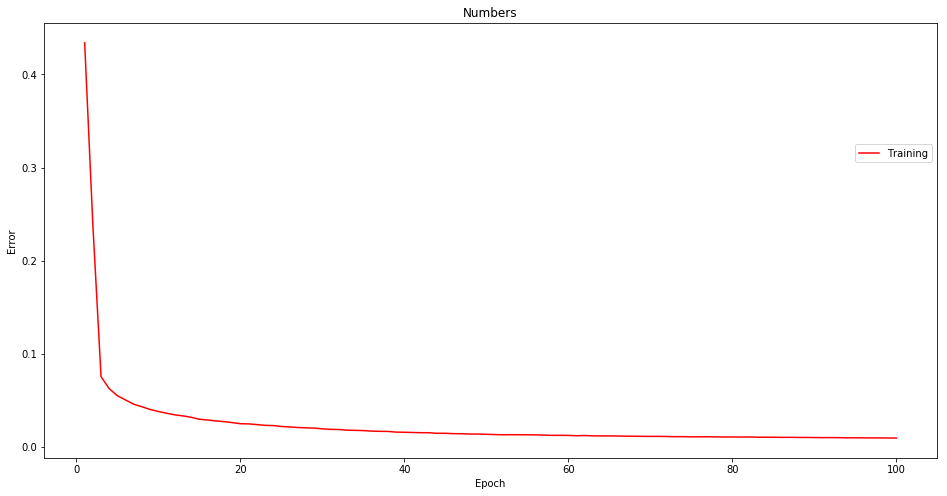

In [22]:
plot_graph(data_7, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 8

In [13]:
net_8 = NeuralNetwork(dim_x*dim_y ,[50, 10], 2*[tanh_func])  # 19,81% - treino / 19,91% - teste
data_8 = net_8.fit(dataset, "mini-batch", 100, lr_ = 0.7, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.9, print_info = True)

Epoch 1/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.7173 - categorical_accuracy: 0.1570
Epoch 2/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.9361 - categorical_accuracy: 0.1823
Epoch 3/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.9361 - categorical_accuracy: 0.1831
Epoch 4/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.9361 - categorical_accuracy: 0.1840
Epoch 5/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.9348 - categorical_accuracy: 0.1855
Epoch 6/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.9361 - categorical_accuracy: 0.1647
Epoch 7/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.9361 - categorical_accuracy: 0.1650
Epoch 8/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.9361 - categorical_accuracy: 0.1650
Epoch 9/100
60000/60000 [===========================

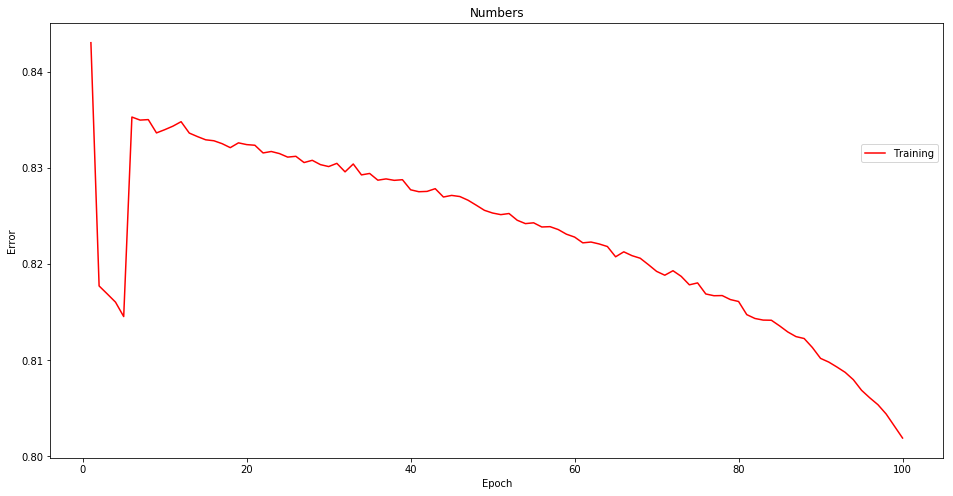

In [14]:
plot_graph(data_8, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 9

In [8]:
net_9 = NeuralNetwork(dim_x*dim_y ,[30, 20, 10], 3*[sig_func]) # 99.23% - treino / 96.24% - teste
data_9 = net_9.fit(dataset, "mini-batch", 100, lr_ = 0.8, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.9, print_info = True)

Epoch 1/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.0577 - categorical_accuracy: 0.5730
Epoch 2/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.0172 - categorical_accuracy: 0.9039
Epoch 3/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0124 - categorical_accuracy: 0.9266
Epoch 4/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.0104 - categorical_accuracy: 0.9379
Epoch 5/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.0091 - categorical_accuracy: 0.9456
Epoch 6/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0082 - categorical_accuracy: 0.9517
Epoch 7/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0075 - categorical_accuracy: 0.9564
Epoch 8/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0070 - categorical_accuracy: 0.9590
Epoch 9/100
60000/60000 [=============================

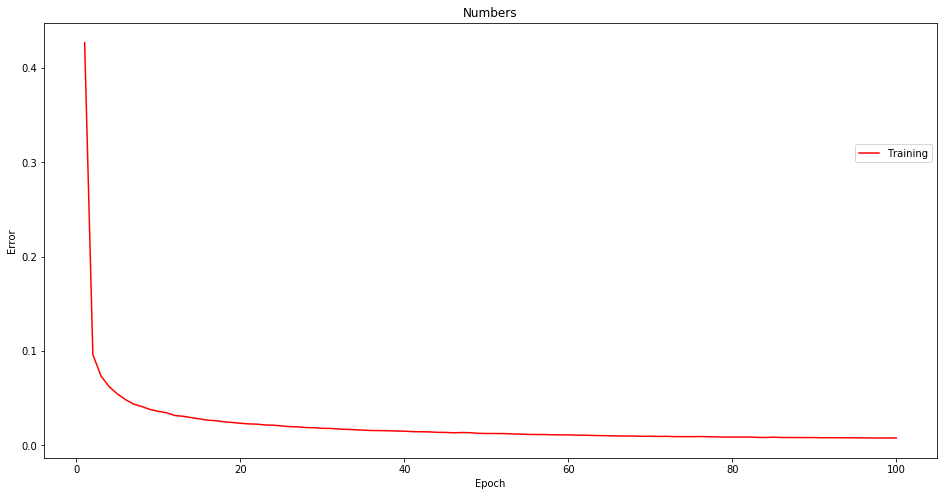

In [9]:
plot_graph(data_9, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Rede Neural 10

In [10]:
net_10 = NeuralNetwork(dim_x*dim_y ,[30,20,10], 3*[tanh_func]) # 97.39% - treino / 94.60% - teste
data_10 = net_10.fit(dataset,"mini-batch", 100, lr_ = 0.8, type = "class",  mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.9, print_info = True)

Epoch 1/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0373 - categorical_accuracy: 0.8450
Epoch 2/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0177 - categorical_accuracy: 0.9238
Epoch 3/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.0158 - categorical_accuracy: 0.9297
Epoch 4/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.0141 - categorical_accuracy: 0.9358
Epoch 5/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0135 - categorical_accuracy: 0.9376
Epoch 6/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0130 - categorical_accuracy: 0.9402
Epoch 7/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.0123 - categorical_accuracy: 0.9422
Epoch 8/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.0118 - categorical_accuracy: 0.9442
Epoch 9/100
60000/60000 [=============================

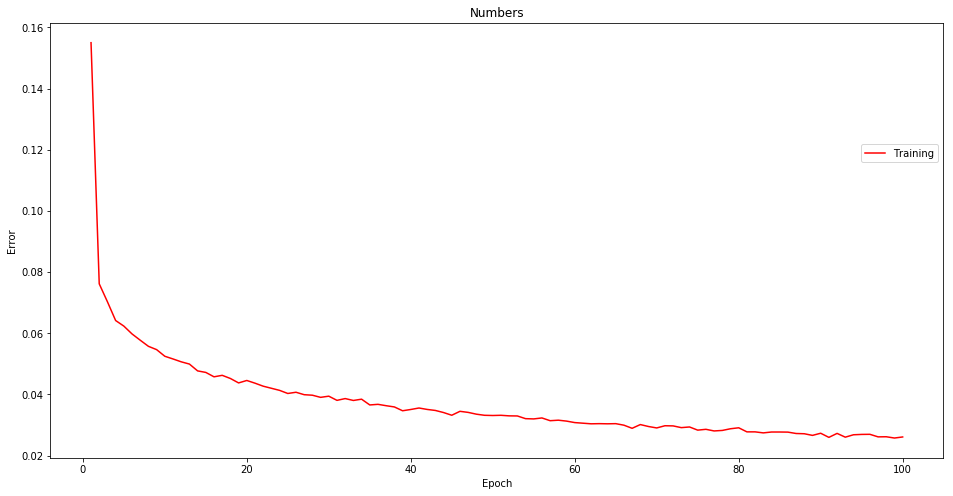

In [12]:
plot_graph(data_10, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)